# HFT Coursework

### Question 1: Data Analysis

I have selected Microsoft Data on Nov 11 2014 for the analysis

We will start by importing the following libraries:

Scipy: To allow us to load/read matlab data. Because the data we want to analyse is in MAT formart

Numpy: To compute the mathematical operations needed to calculate some metrics needed in our analysis

Pandas: This is allow us to convert our data from an array to a dataframe for statistical description

matplotlib: For plotting the graphs we need for our analysis

In [5]:
import scipy.io as sio  
# for loading matlab data

import numpy as np      
# for mathematical operations 

import pandas as pd
#for managing dataframes and statistical analysis on the data

from matplotlib.ticker import FuncFormatter 
# for custom bar plot labels

import matplotlib.pyplot as plt  
# for plotting the graphs needed

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#for defining graphs parameters

### Load Data

In [39]:
data = sio.loadmat('MSFT_20141111.mat')
#we start with loading our data. We are loading the data of Microsoft on Nov 11 2014

In [40]:
LOB = data['LOB']
# Limit Order Book

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO = np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [45]:
bidvol_pd=pd.DataFrame(bidvol)

In [46]:
bidvol_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,200.0,100.0,3100.0,150.0,200.0,100.0,100.0,100.0,100.0,100.0,400.0,100.0,300.0,200.0,100.0,200.0,100.0,100.0,100.0,100.0
1,200.0,100.0,500.0,400.0,2900.0,445.0,95.0,200.0,100.0,200.0,100.0,100.0,100.0,100.0,400.0,100.0,300.0,200.0,100.0,200.0
2,200.0,100.0,500.0,400.0,2900.0,445.0,95.0,200.0,100.0,200.0,100.0,100.0,100.0,100.0,400.0,100.0,300.0,200.0,100.0,200.0
3,318.0,100.0,1246.0,9.0,400.0,200.0,201.0,3100.0,445.0,95.0,200.0,100.0,200.0,100.0,100.0,100.0,100.0,400.0,100.0,300.0
4,100.0,318.0,100.0,1246.0,9.0,400.0,200.0,201.0,3100.0,445.0,95.0,200.0,100.0,200.0,100.0,100.0,100.0,356.0,400.0,100.0


### Midprice, Microprice and Spread

In [14]:
Midprice = 0.5*(bid[:,0]+ask[:,0]) 

Microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])

Spread = ask[:,0]-bid[:,0]

### Midprice

In [15]:
Midprice = pd.DataFrame(Midprice)
Midprice.describe()

,0
count,234000.000000
mean,48.809050
std,0.042394
min,48.655000
25%,48.795000
50%,48.805000
75%,48.835000
max,48.925000


In [50]:
midprice_var=Midprice.std()**2
midprice_var

0    0.001797
dtype: float64

In [19]:
Midprice_ret=np.log(Midprice/Midprice.shift(1))

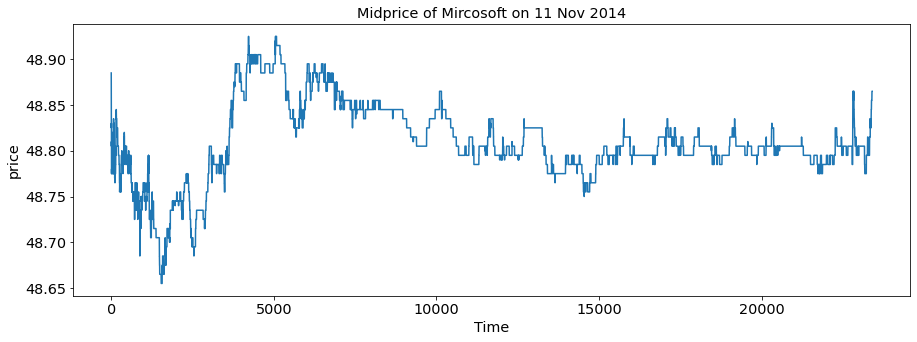

In [47]:
plt.plot(t,np.array(Midprice))
plt.title('Midprice of Mircosoft on 11 Nov 2014')
plt.ylabel('price')
plt.xlabel('Time')
plt.show()

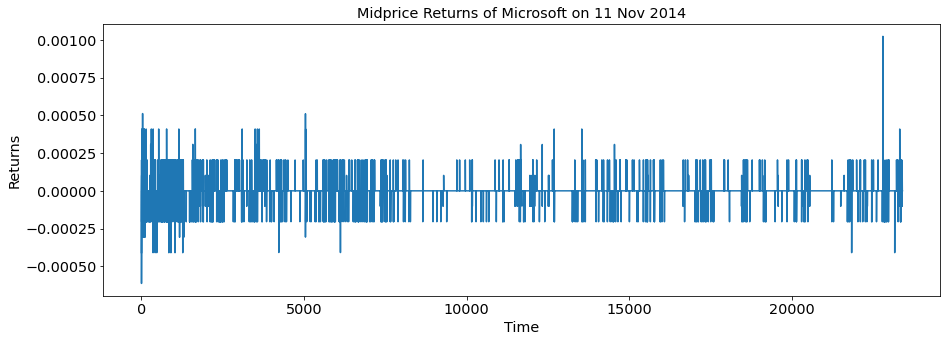

In [21]:
plt.plot(t,np.array(Midprice_ret))
plt.title('Midprice Returns of Microsoft on 11 Nov 2014')
plt.ylabel('Returns')
plt.xlabel('Time')
plt.show()

## Microprice

In [22]:
Microprice = pd.DataFrame(Microprice)
Microprice.describe()

,0
count,234000.000000
mean,48.808259
std,0.042625
min,48.650145
25%,48.790657
50%,48.803711
75%,48.832649
max,48.927474


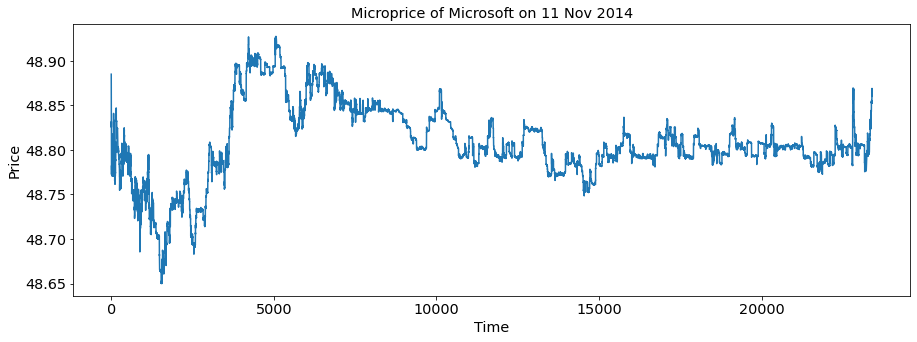

In [23]:
plt.plot(t, np.array(Microprice))
plt.title('Microprice of Microsoft on 11 Nov 2014')
plt.ylabel('Price')
plt.xlabel('Time')
plt.show()

### Difference between Midprice and Microprice

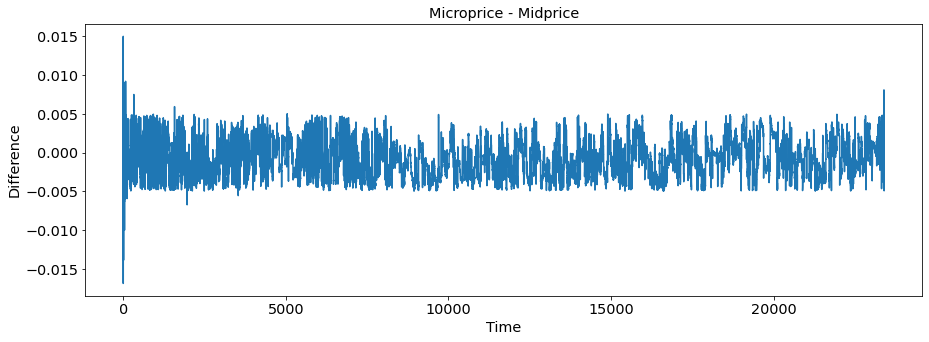

In [25]:
plt.plot(t, np.array(Microprice-Midprice))
plt.title('Microprice - Midprice')
plt.ylabel('Difference')
plt.xlabel('Time')
plt.show()

Note that the difference is typically in the range [-0.01, 0.01] while at the beginning of the day it is three times as large.

### Spread

In [26]:
Spread = pd.DataFrame(Spread)
Spread.describe()

,0
count,234000.000000
mean,0.010108
std,0.001128
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.130000


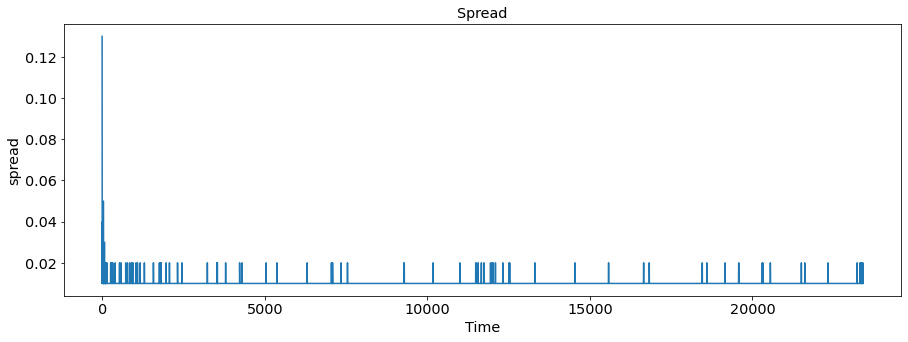

In [27]:
plt.plot(t,np.array(Spread))
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('Time')
plt.show()

This plot shows that the spread is about 0.8 in the morning, but quickly drops to near 0 but for most of time, it fluctuates between 0 and 0.3.

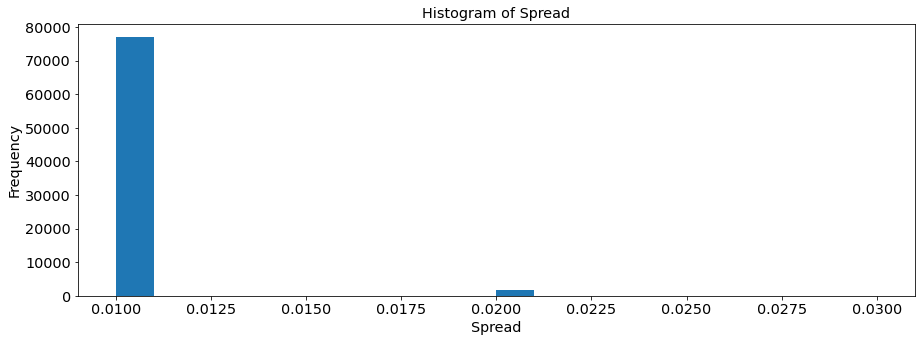

In [30]:
plt.hist(np.array(Spread),bins=[0.01,0.02,0.03], width=0.001,align='mid') 
plt.title("Histogram of Spread")
plt.xlabel(r'Spread')
plt.ylabel('Frequency')
plt.show()

### Volume Imbalance

In [52]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

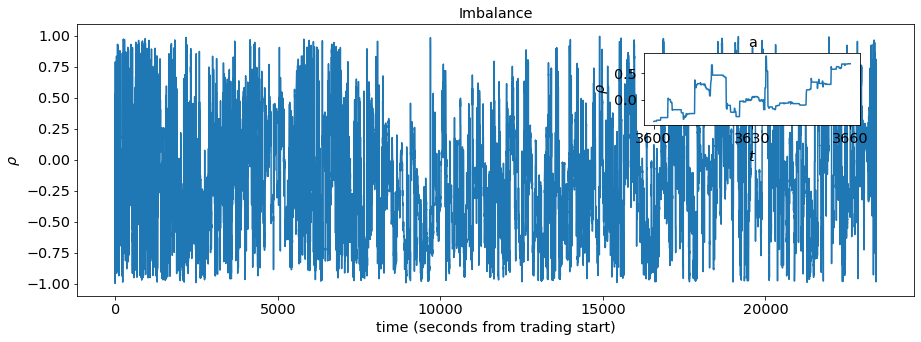

In [53]:
plt.plot(t, rho)
plt.title('Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()

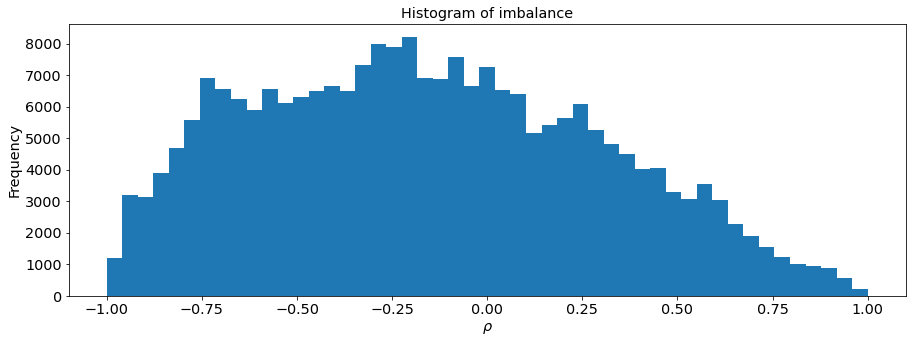

In [54]:
plt.hist(rho, bins=np.linspace(-1, 1, num=50)) 
plt.title("Histogram of imbalance")
plt.xlabel(r'$\rho$')
plt.ylabel('Frequency')
plt.show()

## Volume Imbalance at times of Market Orders

In [34]:
rho_MO = (MO[:,3]-MO[:,4])/(MO[:,3]+MO[:,4])

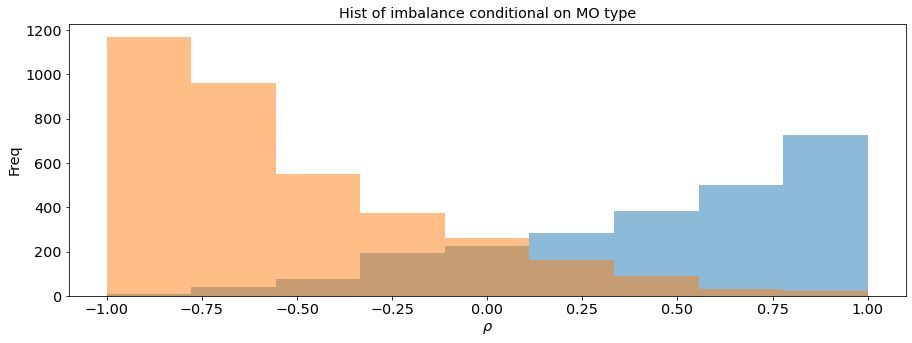

In [35]:
plt.hist(rho_MO[MO[:,7]==-1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.hist(rho_MO[MO[:,7]==+1], bins=np.linspace(-1, 1, num=10),alpha=0.5)
plt.title("Hist of imbalance conditional on MO type")
plt.xlabel(r'$\rho$')
plt.ylabel('Freq')
plt.show()

### Q2:

### Set up Parameters

In [12]:
# parameters
# parameters
S0 = 100 #trading speed is indepent of the stock price
N = 10 ** 7 #number of shares to liquidate;
T = 1; #terminal time, we set it to 1 day
k = 1e-4; #temporary price impact 
b = 1e-4 #permanent price impact
M = 1000;    #Number of trading times
alpha = 0.1;  #Terminal penalty
phi = 0.01; #Inventory penalty (cost of holding the shares)
sigma = 0.30; #Volatity but not relevant for trading speed

### Calculate Parameters

In [13]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [14]:
tt = np.linspace(0, 1, M + 1)

### Optimal Trading Speed and Inventory Process

In [15]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

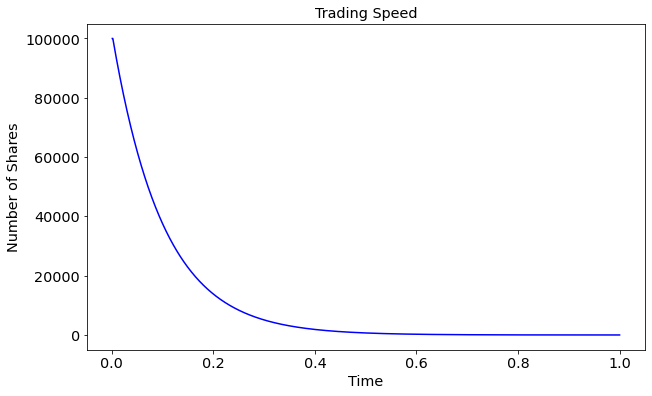

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

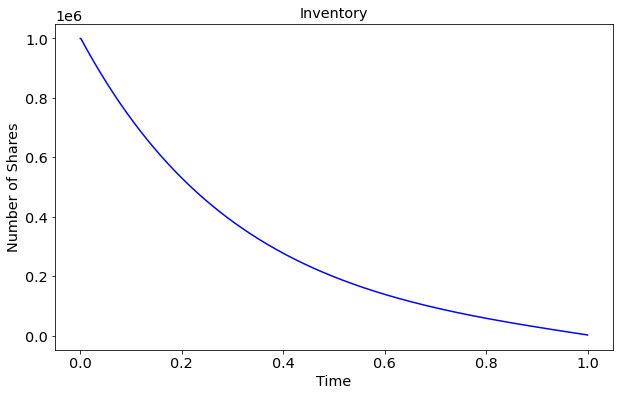

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

## Liquidation with Permanent Price Impact

In [19]:
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [27]:
T = 1 #number of day to execute the trade
Ndt = 6.5 * 3600 #6.5 trading hours and 60 min and 60sec
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.0001 #permanent price impact, we can set up to 0.005
b = 0.0001 #temporary price impact

tau = T - t #time left
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([0.00001, 0.0001, 0.001,0.01]) #ineventory penalty
symb = np.array(["o", "*","+","^"])

alpha = 1

Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty  𝜙  as  𝛼  changes.

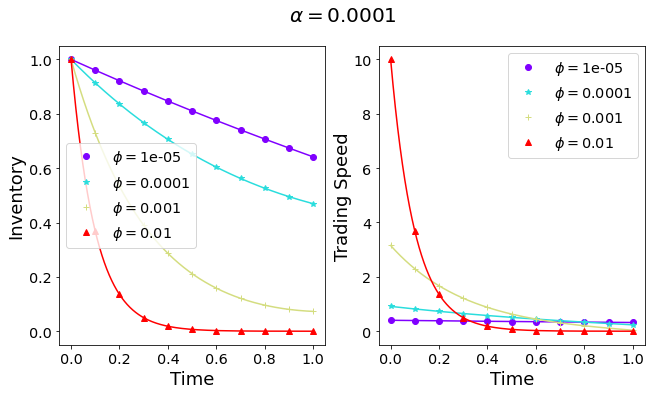

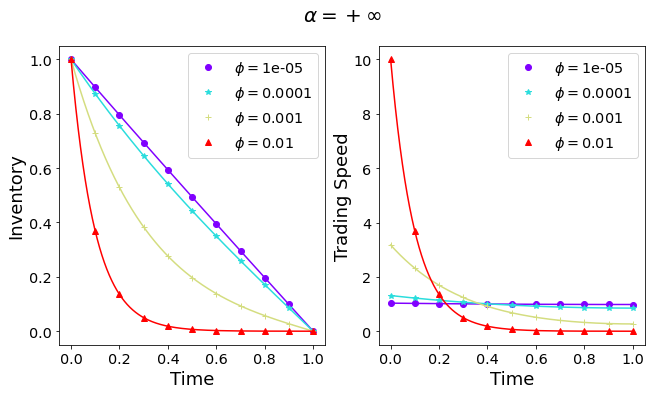

In [30]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.0001, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.0001$")
lppi_helpers.plot_inventory_trading_speed(1000, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")